# Global Power Plant Database

# Problem Statement:
The Global Power Plant Database is a comprehensive, open-source repository of power plant data from around the world. It centralizes information about approximately 35,000 power plants in 167 countries, encompassing various fuel types, including thermal (e.g., coal, gas, oil, nuclear) and renewables (e.g., hydro, wind, solar). The database includes key attributes such as capacity, location, ownership, and generation data. However, the database's users require insights into two critical aspects: the primary fuel used for electricity generation and the electrical generating capacity (capacity_mw) for each power plant.

# The Problem:
While the database contains extensive information about power plants, there is a need to predict two key attributes:

Primary Fuel: To understand the primary source of fuel used for electricity generation in each power plant. Accurate categorization of the primary fuel is essential for policy-making, energy planning, and environmental impact assessments.

Capacity (capacity_mw): To estimate the electrical generating capacity of each power plant, which is a fundamental metric for assessing the power generation capabilities of a region.







# Scope of the Problem:
This problem statement focuses on developing predictive models for these two attributes: "Primary Fuel" and "capacity_mw."

The Impact:
The accurate prediction of "Primary Fuel" and "capacity_mw" is essential for the energy sector, policymakers, and researchers. It will enable better decision-making, resource allocation, and environmental impact assessments. The information will contribute to sustainable energy planning, reduction of greenhouse gas emissions, and the efficient allocation of resources.




# Objectives:

Develop a model to predict the primary fuel source used for electricity generation in power plants based on available data.
Create a model to estimate the electrical generating capacity (capacity_mw) of power plants using the provided attributes.





# Key Questions:
Why is predicting primary fuel and capacity important for energy planning and analysis?

What data sources and features will be used to make these predictions?

How will the models be evaluated, and what are the success criteria?



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
df = pd.read_csv('Power_Plant.csv')


In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(907, 27)

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


In [9]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Outcome

Non-Null Counts and DataTypes:

The dataset contains 907 entries with 27 columns.

Among the columns:
    
There are missing values (null values) in columns: latitude, longitude, other_fuel1, other_fuel2, commissioning_year, owner, geolocation_source, year_of_capacity_data, generation_gwh_2014 to generation_gwh_2019, and generation_data_source.
    
Some columns have all null values: other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, and estimated_generation_gwh

-12 object data types and 14 numerical data types

In [10]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

# Outcome

After observation, we requitred that Coloumns with No Values other_fuel, weep_id, generation_gwh_2019, estimated_generation_gwh,we need to delete these coloumns.

also,columns with only sigle unique values country, country long, other_fuel2,year_of_capacity_data, generation_data_source, so we will remove it in comimng steps

# Removing Irrelevent column:

In [11]:
# Dropping country and country_long columns as it contains only 'India' as value.

df = df.drop('country', axis =1)
df = df.drop('country_long', axis =1)

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [12]:
#The column 'other_fuel2' contains only 1 value. So, it is better to drop this column.

#The columns 'other_fuel3', 'wepp_id','"generation_gwh_2013"' and 'estimated_generation_gwh' do not contain any values. So, we'll drop these columns.
columns_to_drop = ['other_fuel2', 'other_fuel3', 'wepp_id','generation_gwh_2013','estimated_generation_gwh','url','generation_gwh_2019']
df.drop(columns=columns_to_drop, inplace=True)


In [13]:
# Checking the dataset again.

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [14]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

some feature are important for our database so we can not delete.

# Handling Missing Value

1.generation_gwh_2014

In [15]:
# Checking the mean for 'generation_gwh_2014'
mean_generation_gwh_2014 = df['generation_gwh_2014'].mean()
print(mean_generation_gwh_2014)


2431.823590196344


In [16]:
# Replacing missing values with the mean for 'generation_gwh_2014'
df['generation_gwh_2014'].fillna(mean_generation_gwh_2014, inplace=True)


2.generation_gwh_2015

In [17]:
# Checking the mean for 'generation_gwh_2015'
mean_generation_gwh_2015 = df['generation_gwh_2015'].mean()
print(mean_generation_gwh_2015)



2428.2269459614085


In [18]:
# Replacing missing values with the mean for 'generation_gwh_2015'
df['generation_gwh_2015'].fillna(mean_generation_gwh_2015, inplace=True)


3.generation_gwh_2016

In [19]:
# Checking the mean for 'generation_gwh_2016'
mean_generation_gwh_2016 = df['generation_gwh_2016'].mean()
print(mean_generation_gwh_2016)

2467.936858634909


In [20]:
# Replacing missing values with the mean for 'generation_gwh_2016'
df['generation_gwh_2016'].fillna(mean_generation_gwh_2016, inplace=True)


4.generation_gwh_2017

In [21]:
# Checking the mean for 'generation_gwh_2017'
mean_generation_gwh_2017 = df['generation_gwh_2017'].mean()
print(mean_generation_gwh_2017)

2547.759304510204


In [22]:
# Replacing missing values with the mean for 'generation_gwh_2017'
df['generation_gwh_2017'].fillna(mean_generation_gwh_2017, inplace=True)

5.other_fuel1

In [23]:
# Checking for the value counts before handling missing values
print(df['other_fuel1'].value_counts())

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


In [24]:
# Replacing missing values with '0'
df['other_fuel1'].fillna('0', inplace=True)


6.commissioning_year

In [25]:
# Checking the median for 'commissioning_year'
median_commissioning_year = df['commissioning_year'].median()
print(median_commissioning_year)


2001.0


In [26]:
# Replacing missing values with the median for 'commissioning_year'
df['commissioning_year'].fillna(2001, inplace=True)

7.latitude

In [27]:
# Checking the median for 'latitude'
median_latitude = df['latitude'].median()
print(median_latitude)


21.78


In [28]:

# Replacing missing values with the median for 'latitude'
df['latitude'].fillna(21.78, inplace=True)


8.longitude

In [29]:
# Checking the median for 'longitude'
median_longitude = df['longitude'].median()
print(median_longitude)

76.7195


In [30]:
# Replacing missing values with the median for 'longitude'
df['longitude'].fillna(76.7195, inplace=True)

9.generation_gwh_2018

In [31]:
# Checking the mean for 'generation_gwh_2018'
mean_generation_2018 = df['generation_gwh_2018'].mean()
print(mean_generation_2018)

2600.804098662014


In [32]:
# Replacing missing values with the mean for 'generation_gwh_2018'
df['generation_gwh_2018'].fillna(mean_generation_2018, inplace=True)


In [33]:
# Checking for the missing values again.

df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

# Data Visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


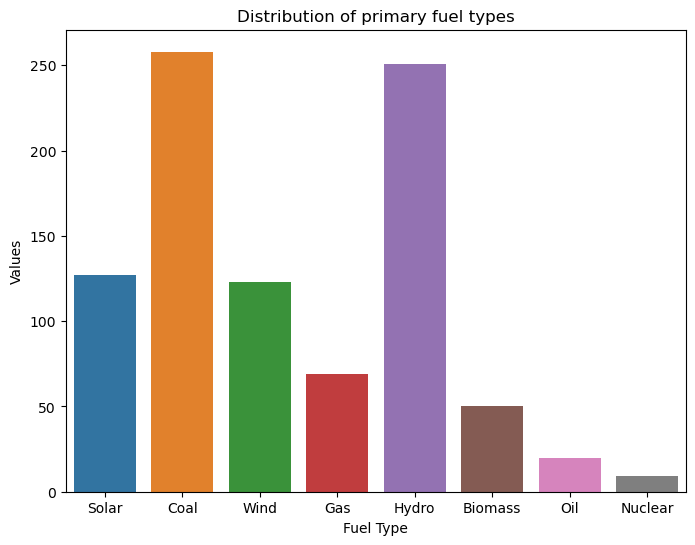

In [34]:
# Checking the value counts for 'primary_fuel'
print(df['primary_fuel'].value_counts())

# Plotting a bar plot to visualize the distribution of the target column

plt.figure(figsize=[8,6])
sns.countplot(x='primary_fuel', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Values')
plt.title('Distribution of primary fuel types')
plt.show()


we observed that primary fuel is imbalanced Data set.

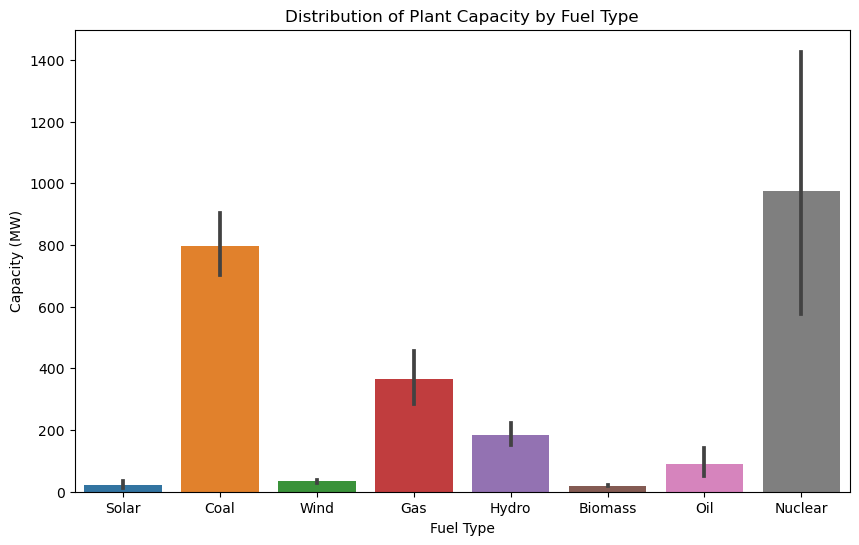

In [35]:

# Creating a boxplot to show the distribution of capacity based on fuel types
plt.figure(figsize=[10, 6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Capacity (MW)')
plt.title('Distribution of Plant Capacity by Fuel Type')
plt.show()


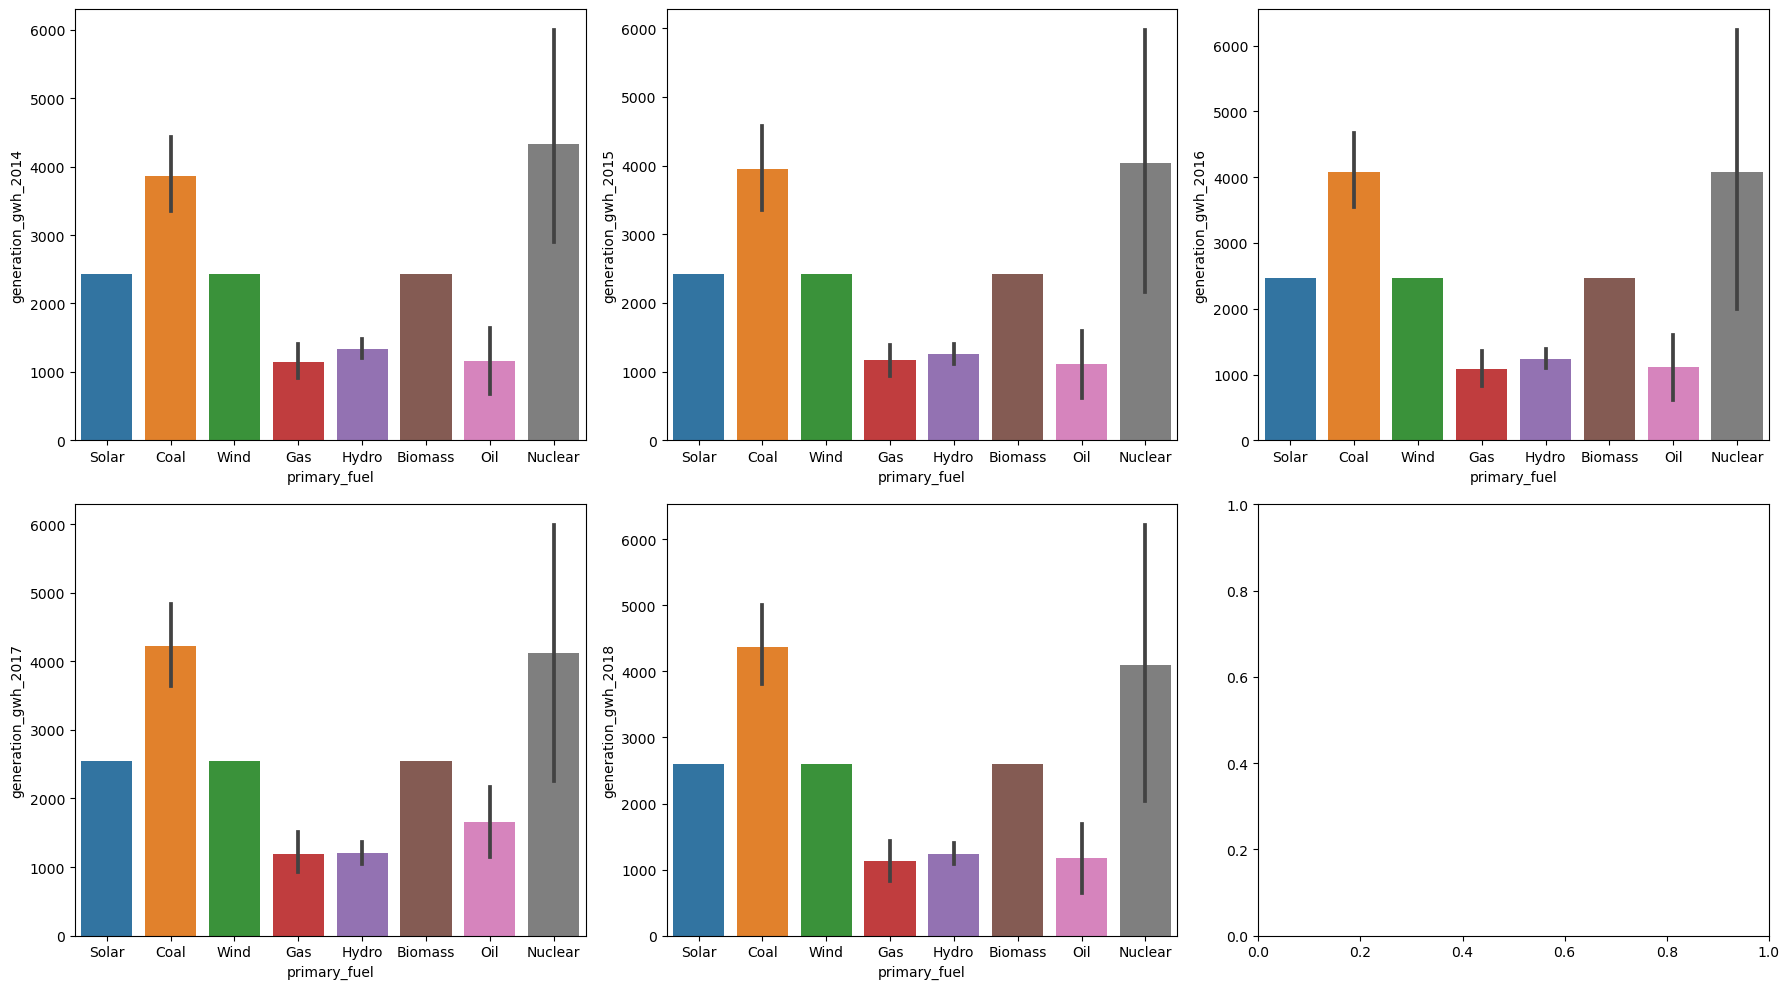

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(x='primary_fuel', y='generation_gwh_2014', ax=axes[0, 0], data=df)
sns.barplot(x='primary_fuel', y='generation_gwh_2015', ax=axes[0, 1], data=df)
sns.barplot(x='primary_fuel', y='generation_gwh_2016', ax=axes[0, 2], data=df)
sns.barplot(x='primary_fuel', y='generation_gwh_2017', ax=axes[1, 0], data=df)
sns.barplot(x='primary_fuel', y='generation_gwh_2018', ax=axes[1, 1], data=df)

plt.tight_layout()
plt.show()


here according to dataset  nuclear plant are low in number but they have more energy production every year

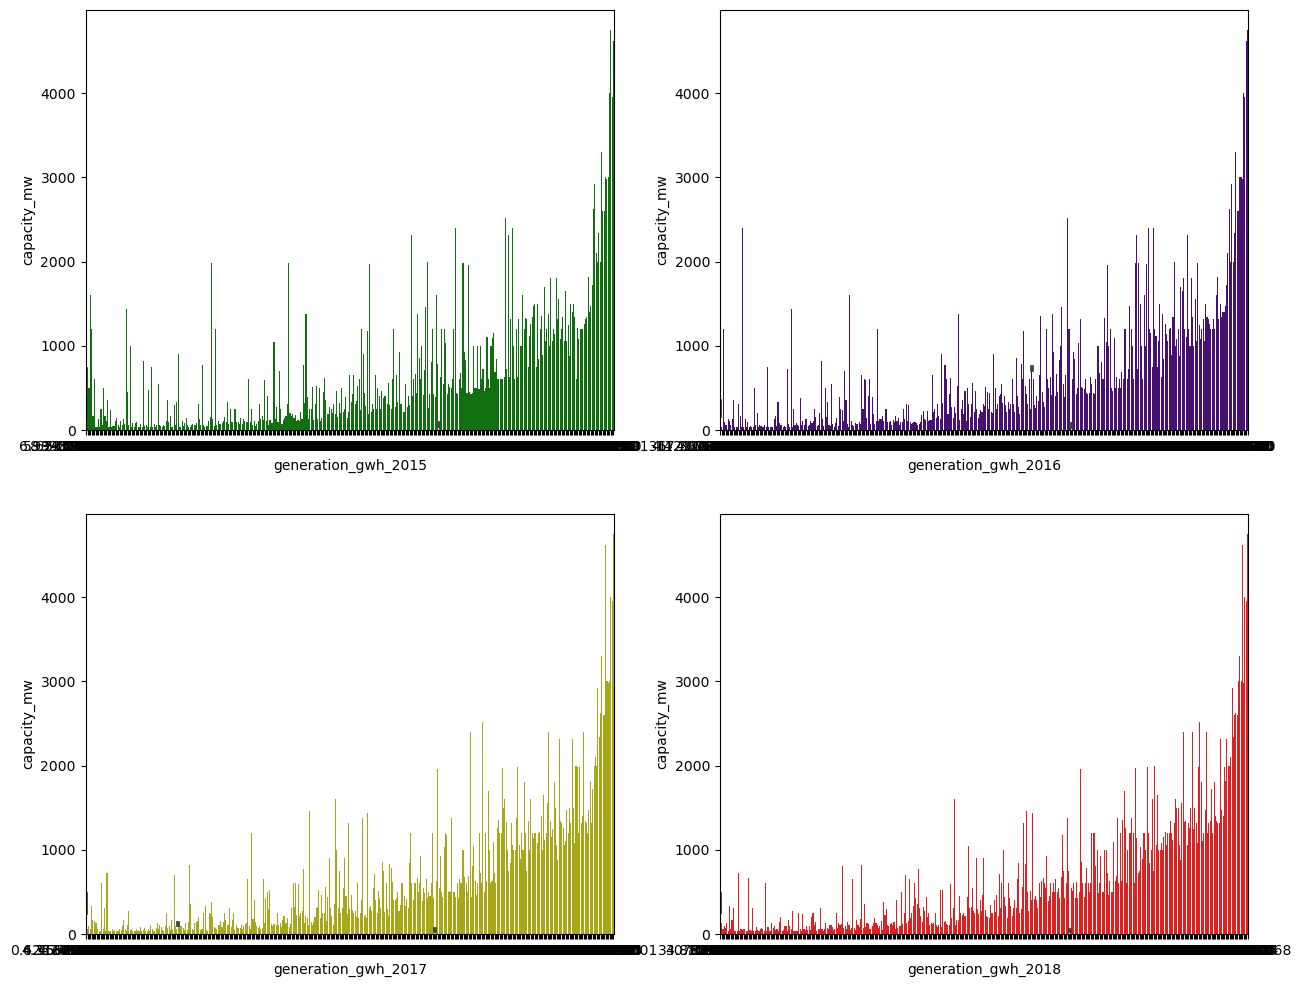

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Checking the relation between generation_gwh_2015 and capacity_mw
sns.barplot(x='generation_gwh_2015', y='capacity_mw', ax=axes[0, 0], data=df, color="g")

# Checking the relation between generation_gwh_2016 and capacity_mw
sns.barplot(x='generation_gwh_2016', y='capacity_mw', ax=axes[0, 1], data=df, color="indigo")

# Checking the relation between generation_gwh_2017 and capacity_mw
sns.barplot(x='generation_gwh_2017', y='capacity_mw', ax=axes[1, 0], data=df, color="y")

# Checking the relation between generation_gwh_2018 and capacity_mw
sns.barplot(x='generation_gwh_2018', y='capacity_mw', ax=axes[1, 1], data=df, color="r")

plt.show()


There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.


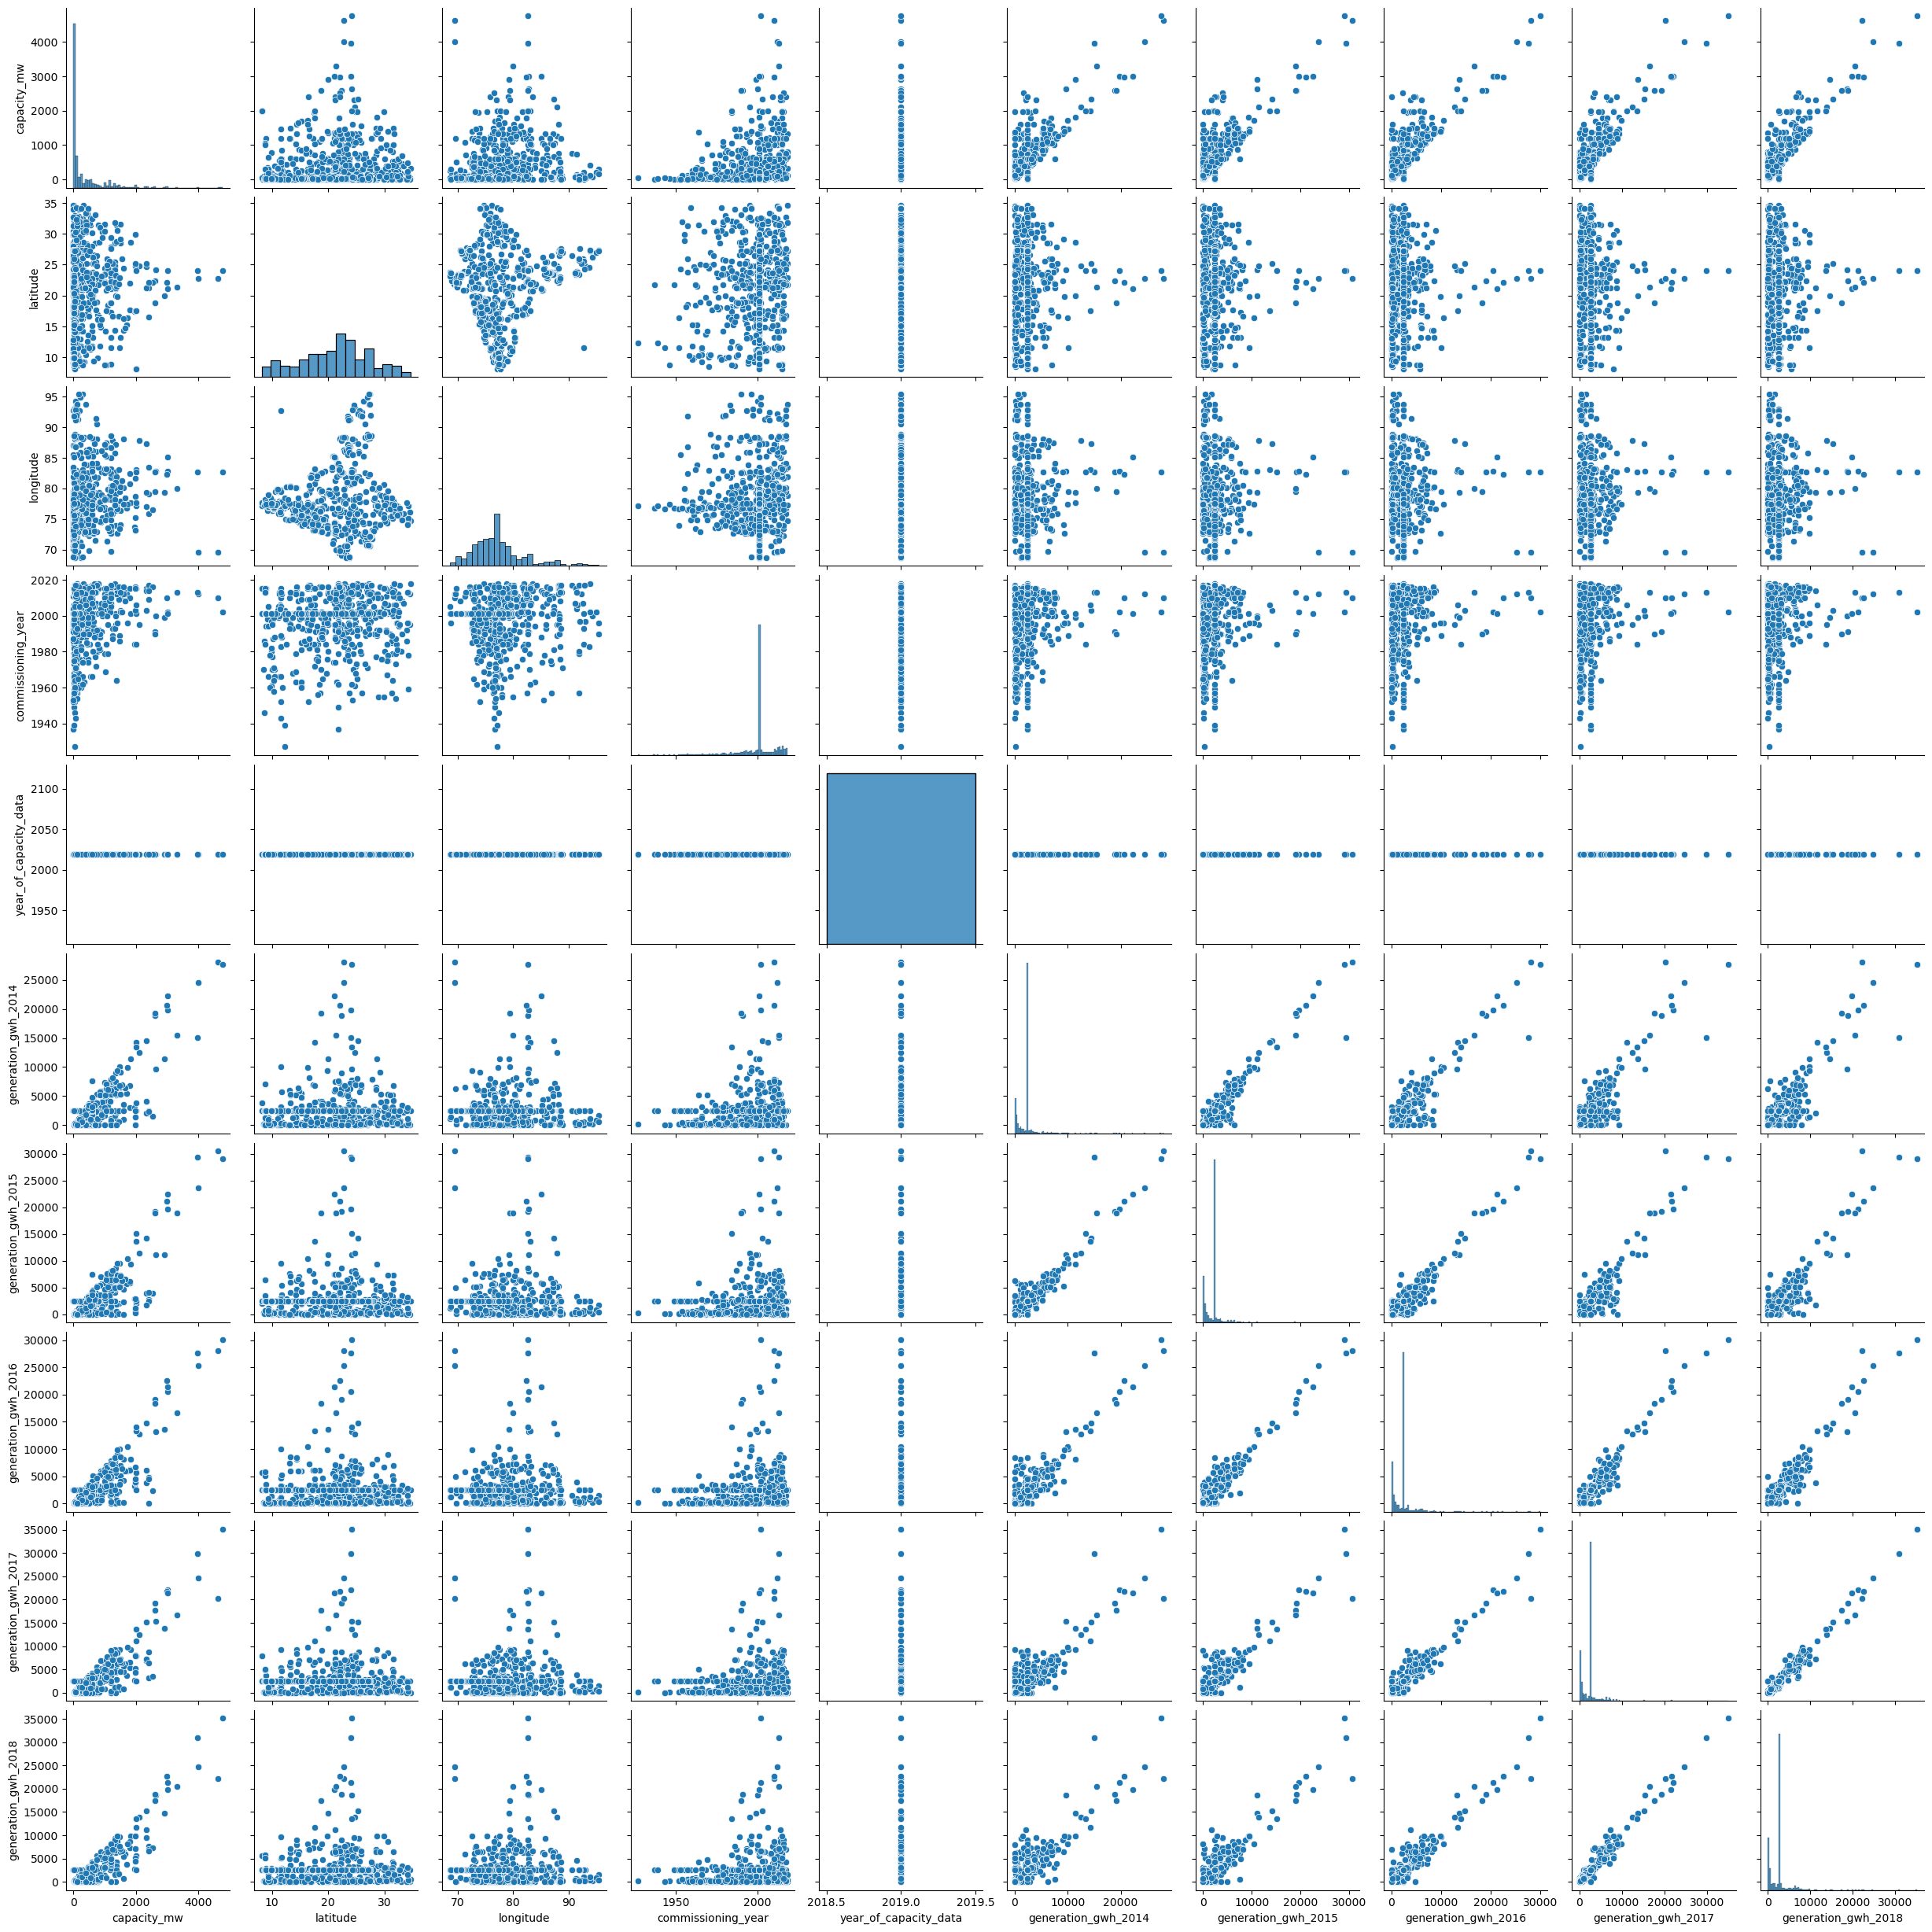

In [38]:
# Checking the pairwise relation between the features.
sns.pairplot(df)

we observed from above plot that we conclude that there are linear relationship between few variable.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   gppd_idnr               907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                907 non-null    float64
 4   longitude               907 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   other_fuel1             907 non-null    object 
 7   commissioning_year      907 non-null    float64
 8   owner                   342 non-null    object 
 9   source                  907 non-null    object 
 10  geolocation_source      888 non-null    object 
 11  year_of_capacity_data   519 non-null    float64
 12  generation_gwh_2014     907 non-null    float64
 13  generation_gwh_2015     907 non-null    float64
 14  generation_gwh_2016     907 non-null    fl

# Label Encoder for categorical feature:

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Selecting categorical columns to be encoded
categorical_columns = ['name','gppd_idnr','primary_fuel', 'other_fuel1', 'owner', 'source', 'geolocation_source', 'generation_data_source']

# Encoding categorical columns and replacing original columns with encoded values
for col in categorical_columns:
    if col in df.columns:
        df[f'{col}_encoded'] = label_encoder.fit_transform(df[col].astype(str))
        df.drop(col, axis=1, inplace=True)

df.head()


,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_encoded,gppd_idnr_encoded,primary_fuel_encoded,other_fuel1_encoded,owner_encoded,source_encoded,geolocation_source_encoded,generation_data_source_encoded
0,2.5,28.1839,73.2407,2011.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0,657,6,0,229,109,1,1
1,98.0,24.7663,74.6090,2001.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,519,1,0,258,174,2,1
2,39.2,21.9038,69.3732,2001.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,2,853,7,0,2,21,2,1
3,135.0,23.8712,91.3602,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,3,0,2,0,280,22,2,0
4,1800.0,21.9603,82.4091,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4,1,1,3,280,22,2,0


Here geolocation_source and generation_data_source are irelevent.so delete this.

In [42]:
# Dropping 'geolocation_source' and 'generation_data_source'
columns_to_drop = ['geolocation_source_encoded', 'generation_data_source_encoded']
df = df.drop(columns=columns_to_drop, axis=1)

# check for statistical summary:¶

In [43]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_encoded,gppd_idnr_encoded,primary_fuel_encoded,other_fuel1_encoded,owner_encoded,source_encoded
count,907.000000,907.000000,907.000000,907.000000,519.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.227439,77.427103,1998.728776,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,453.000000,453.000000,3.206174,0.650496,227.476295,43.847850
std,590.085456,6.080491,4.815073,13.158621,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,261.972645,261.972645,2.280652,1.234264,83.924045,44.642818
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,226.500000,226.500000,1.000000,0.000000,188.500000,22.000000
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,453.000000,453.000000,3.000000,0.000000,280.000000,22.000000
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,679.500000,679.500000,6.000000,0.000000,280.000000,29.500000
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,906.000000,906.000000,7.000000,3.000000,280.000000,190.000000


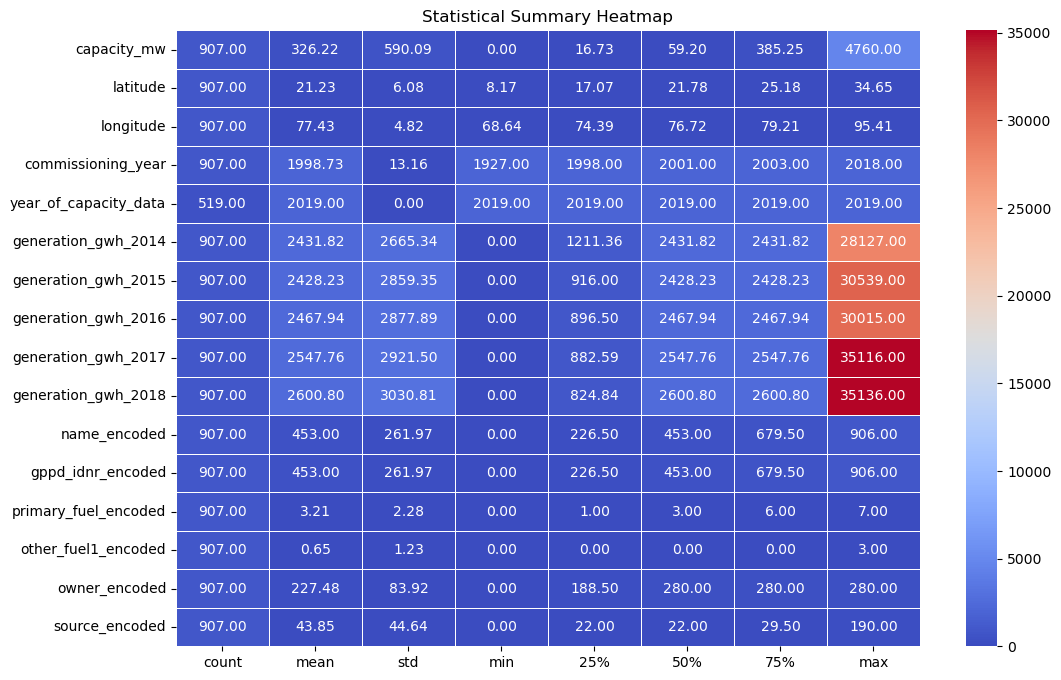

In [44]:
# Calculate statistical summary for the DataFrame except the non-numeric columns
stat_summary = df.describe()

# Transpose the summary for a better visualization
stat_summary = stat_summary.transpose()

plt.figure(figsize=(12, 8))
sns.heatmap(stat_summary, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Statistical Summary Heatmap')
plt.show()

# Correlation

In [45]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_encoded,gppd_idnr_encoded,primary_fuel_encoded,other_fuel1_encoded,owner_encoded,source_encoded
capacity_mw,1.000000,0.048790,0.199299,0.211042,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,0.060240,-0.335742,-0.380395,0.633525,3.043221e-01,-2.421218e-01
latitude,0.048790,1.000000,0.035619,0.088098,NaN,4.376364e-02,3.574228e-02,3.055074e-02,3.030986e-02,3.043825e-02,-0.134571,-0.105090,-0.007538,0.042595,8.033784e-03,5.432370e-02
longitude,0.199299,0.035619,1.000000,0.029583,NaN,1.235147e-02,1.985463e-02,4.031576e-02,4.110091e-02,3.918265e-02,0.019222,-0.378588,-0.352056,0.297579,2.769644e-01,-2.366230e-01
commissioning_year,0.211042,0.088098,0.029583,1.000000,NaN,1.316121e-01,1.457447e-01,1.687991e-01,1.690159e-01,1.724914e-01,-0.044514,0.167532,-0.054885,0.276803,-1.242924e-01,1.007472e-01
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.043764,0.012351,0.131612,NaN,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01,0.083759,0.044518,-0.124769,0.359529,-2.638213e-16,1.217659e-17
generation_gwh_2015,0.711190,0.035742,0.019855,0.145745,NaN,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01,0.073665,0.038958,-0.124828,0.355960,-1.028297e-16,-2.425164e-17
generation_gwh_2016,0.742221,0.030551,0.040316,0.168799,NaN,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01,0.066177,0.026831,-0.131051,0.375369,1.197027e-18,-4.906884e-17
generation_gwh_2017,0.757585,0.030310,0.041101,0.169016,NaN,8.916868e-01,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01,0.073634,0.022853,-0.132003,0.385554,7.321008e-17,-1.375682e-16
generation_gwh_2018,0.773456,0.030438,0.039183,0.172491,NaN,8.849556e-01,9.234611e-01,9.571589e-01,9.826888e-01,1.000000e+00,0.066638,0.019265,-0.136983,0.390888,-5.815764e-17,-4.273507e-18


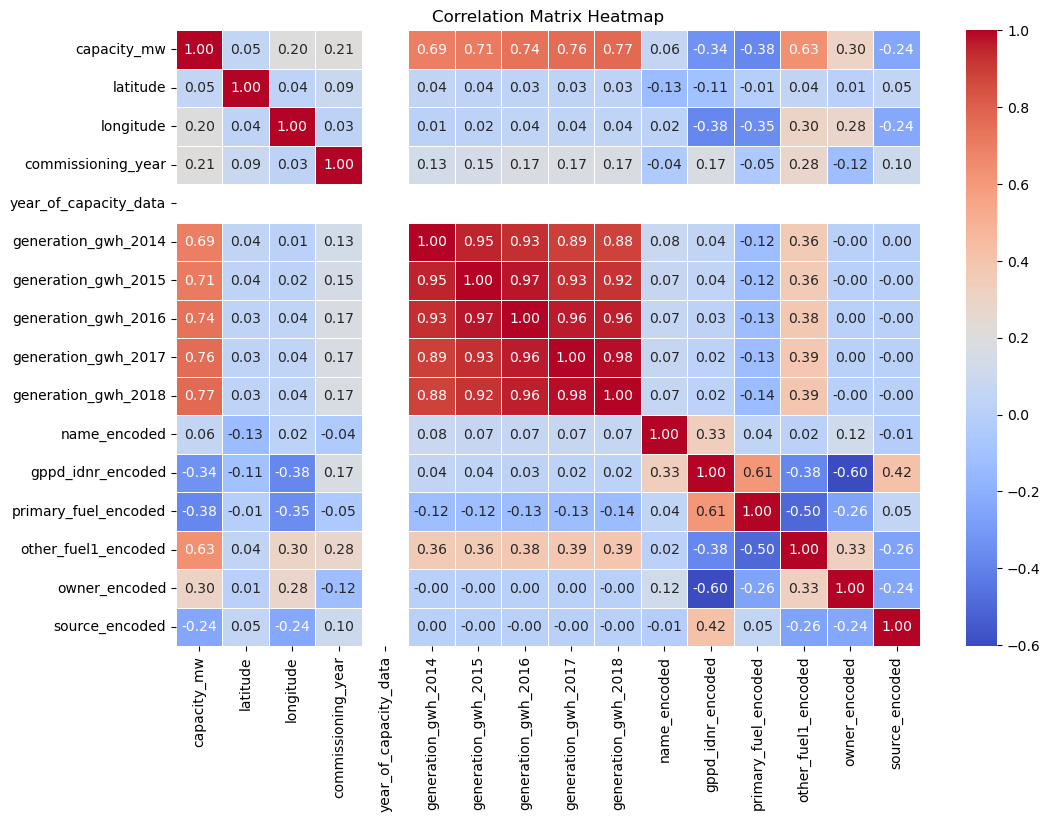

In [46]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

-Values Range: The values of the correlation coefficient range between -1 and 1.

-Values close to 1 indicate a strong positive correlation.

-Values close to -1 indicate a strong negative correlation.

-Values around 0 suggest no linear correlation.
Correlation Between Features:

Positive Correlation: A positive value (close to 1) means that as one feature increases, the other also tends to increase. For instance, you can observe positive correlations between columns such as 'capacity_mw' and 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018'.

Negative Correlation: A negative value (close to -1) implies that as one feature increases, the other tends to decrease, and vice versa. An example is the negative correlation between 'capacity_mw' and 'primary_fuel_encoded'.

Near 0 Correlation: Values around 0 suggest a weak linear relationship between the features. For example, 'latitude' and 'longitude' have a correlation coefficient close to 0, indicating a weak correlation.

'NaN' Values: In the matrix, 'NaN' values denote missing or undefined correlations. For instance, 'year_of_capacity_data' doesn't have data correlations with the other columns.

In [47]:
#dropping the columns which are not contributing to the dataset

df = df.drop('other_fuel1_encoded', axis=1)
df = df.drop('year_of_capacity_data', axis=1)

# Check Skewness

# with Boxplot Check Outliers

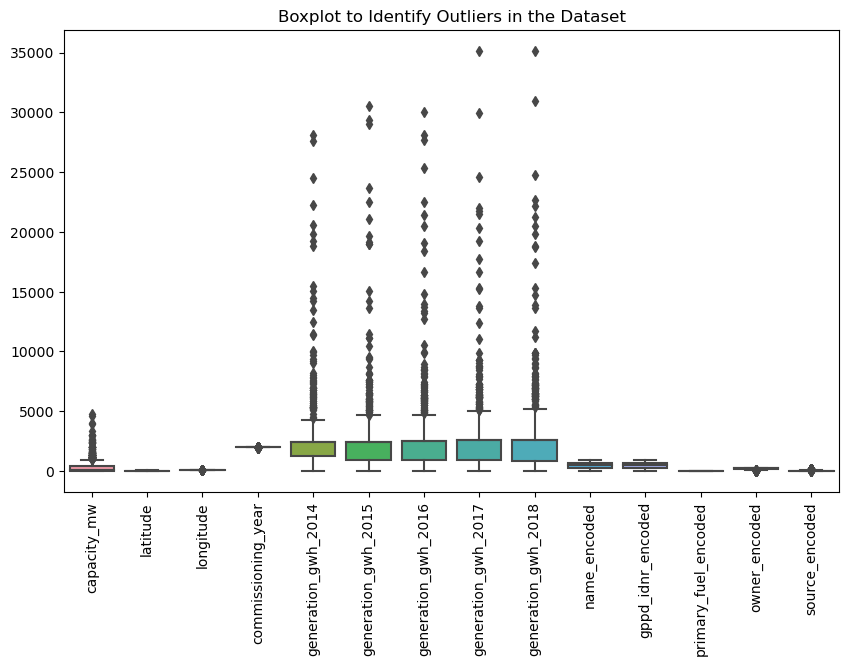

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.title("Boxplot to Identify Outliers in the Dataset")
plt.show()


all features contained outliers except latitude column and primary fuel.

In [49]:
from scipy import stats

# Assuming df is your DataFrame
z_scores = np.abs(stats.zscore(df._get_numeric_data()))
threshold = 3

# Filter out rows where the absolute Z-score is greater than the threshold
df_new = df[(z_scores < threshold).all(axis=1)]


In [50]:
df_new

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,name_encoded,gppd_idnr_encoded,primary_fuel_encoded,owner_encoded,source_encoded
0,2.5,28.1839,73.2407,2011.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0,657,6,229,109
1,98.0,24.7663,74.6090,2001.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,519,1,258,174
2,39.2,21.9038,69.3732,2001.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,2,853,7,2,21
3,135.0,23.8712,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,3,0,2,280,22
4,1800.0,21.9603,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4,1,1,280,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,2431.823590,0.994875,233.596650,865.400000,686.500000,902,491,1,280,22
903,3.0,12.8932,78.1654,2001.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,903,822,6,114,77
904,25.5,15.2758,75.5811,2001.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,904,891,7,280,21
905,80.0,24.3500,73.7477,2001.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,905,539,1,91,59


In [51]:
# Calculate the percentage loss after removing outliers
original_rows = df.shape[0]
rows_after_outliers_removal = df_new.shape[0]

percentage_loss = ((original_rows - rows_after_outliers_removal) / original_rows) * 100

print(f"Percentage loss after outlier removal: {percentage_loss:.2f}%")


Percentage loss after outlier removal: 8.16%


In [52]:
# Renaming the column
df.rename(columns={'primary_fuel_encoded': 'primary_fuel'}, inplace=True)


# Skewneess

In [53]:
df.skew()

capacity_mw            3.123576
latitude              -0.164152
longitude              1.163320
commissioning_year    -1.719575
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
name_encoded           0.000000
gppd_idnr_encoded      0.000000
primary_fuel           0.472251
owner_encoded         -1.373940
source_encoded         1.827373
dtype: float64

In [54]:
# Splitting the data in independent and target variable.
# 'primary_fuel_e' as target variable:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

# 'capacity_mw' as target variable:

x1 = df.drop(['capacity_mw'], axis=1)
y1 = df['capacity_mw']

# Part1. "Primary Fuel"  (for fuel_type prediction)

# Remove the skewness

Using Powertransform technique

In [55]:
# Removing skewness from 'x'
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

capacity_mw            0.022164
latitude              -0.076546
longitude              0.002675
commissioning_year    -0.525056
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
name_encoded          -0.288179
gppd_idnr_encoded     -0.288179
owner_encoded         -1.025314
source_encoded        -0.214066
dtype: float64

standard scaler

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.54890755,  1.14469346, -0.86991672, ...,  0.77913689,
         0.01816577,  1.46021461],
       [-0.38697729,  0.58232352, -0.58558978, ...,  0.2520737 ,
         0.36390697,  2.91701919],
       [-0.48667885,  0.11129591, -1.67356683, ...,  1.52771939,
        -2.68815328, -0.51207465],
       ...,
       [-0.50990864, -0.97934898, -0.38359152, ...,  1.67285273,
         0.6261934 , -0.51207465],
       [-0.41749818,  0.51382088, -0.76456427, ...,  0.32845967,
        -1.62708546,  0.33959571],
       [-0.52516908, -1.85828239,  0.0103269 , ...,  1.61556326,
         0.61427129, -0.51207465]])

# Handling Data imbalance by oversampling

In [57]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Fit and resample the data
x_oversampled, y_oversampled = smote.fit_resample(x, y)


In [58]:
y_oversampled.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Finding best random State

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

best_random_state = None
best_accuracy = 0.0

for state in range(0, 601):
    x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size=0.2, random_state=state)
    model = LogisticRegression(max_iter=10000)  # Create an instance of Logistic Regression model
    model.fit(x_train, y_train)  # Fit the model with the training data
    y_pred = model.predict(x_test)  # Predict on the test data
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = state

print(f"Best Random State: {best_random_state}")
print(f"Best Accuracy: {best_accuracy}")


Best Random State: 198
Best Accuracy: 0.8256658595641646


# Data Preprocessing

In [60]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size=0.2, random_state=198)

# Model Training

# Logistic Regressor

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of Logistic Regression
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x_train, y_train)

# Make predictions
y_pred = log_reg.predict(x_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8232445520581114
Confusion Matrix:
[[53  0  0  0  0  0  0  0]
 [ 5 23  4  2  7  3  0  0]
 [ 2  5 35  5  3  4  0  0]
 [ 1  2  5 44  3  4  0  0]
 [ 0  0  0  4 54  0  0  0]
 [ 6  0  1  2  0 36  0  0]
 [ 1  0  0  0  0  0 52  4]
 [ 0  0  0  0  0  0  0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        53
           1       0.77      0.52      0.62        44
           2       0.78      0.65      0.71        54
           3       0.77      0.75      0.76        59
           4       0.81      0.93      0.86        58
           5       0.77      0.80      0.78        45
           6       1.00      0.91      0.95        57
           7       0.91      1.00      0.96        43

    accuracy                           0.82       413
   macro avg       0.82      0.82      0.81       413
weighted avg       0.82      0.82      0.82       413



# Decision Tree Classifier

In [62]:
# Create an instance of Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(x_train, y_train)

# Make predictions
y_pred = decision_tree.predict(x_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9152542372881356
Confusion Matrix:
[[50  2  0  0  0  1  0  0]
 [ 3 32  4  1  3  1  0  0]
 [ 0  3 46  1  1  3  0  0]
 [ 0  3  3 53  0  0  0  0]
 [ 1  0  0  3 54  0  0  0]
 [ 0  0  2  0  0 43  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.80      0.73      0.76        44
           2       0.84      0.85      0.84        54
           3       0.91      0.90      0.91        59
           4       0.93      0.93      0.93        58
           5       0.90      0.96      0.92        45
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        43

    accuracy                           0.92       413
   macro avg       0.91      0.91      0.91       413
weighted avg       0.91      0.92      0.91       413



# K-Nearest Neighbors:

In [63]:
# Initialize the KNN model (let's say with 5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train, y_train)  # Assuming x_train and y_train are your training data

# Make predictions
y_pred = knn.predict(x_test)  # Assuming x_test is your test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Assuming y_test is the actual target variable in the test data
print(f"Accuracy: {accuracy}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8765133171912833
Confusion Matrix:
[[52  1  0  0  0  0  0  0]
 [ 5 25  3  2  4  4  1  0]
 [ 1  2 47  2  0  2  0  0]
 [ 0  3  7 44  0  5  0  0]
 [ 0  0  0  0 58  0  0  0]
 [ 0  0  0  2  0 43  0  0]
 [ 4  1  0  0  0  1 50  1]
 [ 0  0  0  0  0  0  0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        53
           1       0.78      0.57      0.66        44
           2       0.82      0.87      0.85        54
           3       0.88      0.75      0.81        59
           4       0.94      1.00      0.97        58
           5       0.78      0.96      0.86        45
           6       0.98      0.88      0.93        57
           7       0.98      1.00      0.99        43

    accuracy                           0.88       413
   macro avg       0.87      0.87      0.87       413
weighted avg       0.88      0.88      0.87       413



# RandomForestClassifier

In [64]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(x_train, y_train)  # Assuming x_train and y_train are your training data

# Make predictions
y_pred = random_forest.predict(x_test)  # Assuming x_test is your test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Assuming y_test is the actual target variable in the test data
print(f"Accuracy: {accuracy}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9467312348668281
Confusion Matrix:
[[52  1  0  0  0  0  0  0]
 [ 3 33  4  1  2  1  0  0]
 [ 1  0 52  0  0  1  0  0]
 [ 0  3  5 51  0  0  0  0]
 [ 0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.89      0.75      0.81        44
           2       0.85      0.96      0.90        54
           3       0.98      0.86      0.92        59
           4       0.97      1.00      0.98        58
           5       0.96      1.00      0.98        45
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        43

    accuracy                           0.95       413
   macro avg       0.95      0.94      0.94       413
weighted avg       0.95      0.95      0.95       413



From RandomForest Classifier, we're getting 95% accuracy score.we're getting highest accuracy score from RandomForest

# Check cross validation score

In [65]:
# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)  # Assuming x and y are your data
    print(f"{name} Cross-Validation Mean Score: {scores.mean()}")


Logistic Regression Cross-Validation Mean Score: 0.7629712828607855
Decision Tree Cross-Validation Mean Score: 0.7949669115414972
Random Forest Cross-Validation Mean Score: 0.8599902859571369
KNN Cross-Validation Mean Score: 0.7386861757027503


In [66]:
#Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    difference = abs(accuracy - mean_cv_score)
    
    print(f"Model: {model_name}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Mean Cross-Validation Score: {mean_cv_score}")
    print(f"Difference: {difference}\n")

Model: Logistic Regression
Accuracy Score: 0.8232445520581114
Mean Cross-Validation Score: 0.7629712828607855
Difference: 0.060273269197325896

Model: Random Forest
Accuracy Score: 0.9539951573849879
Mean Cross-Validation Score: 0.857762127375387
Difference: 0.09623303000960082

Model: Decision Tree
Accuracy Score: 0.9152542372881356
Mean Cross-Validation Score: 0.8015846032420617
Difference: 0.11366963404607389

Model: KNN
Accuracy Score: 0.8765133171912833
Mean Cross-Validation Score: 0.7386861757027503
Difference: 0.13782714148853303



# Best Model for predicting fuel type:

Random Forest seems to be the best-performing model among the ones tested, exhibiting both high accuracy and reasonable cross-validation performance.

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the base Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameters and their ranges
params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]  # Method for sampling data points
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Perform the search
random_search.fit(x_train, y_train)  # Replace X_train and y_train with your training data

# Get the best parameters
print("Best parameters:", random_search.best_params_)

# Get the best estimator
best_rf = random_search.best_estimator_

# Evaluate the best estimator
best_rf.fit(x_train, y_train)
pred_rf = best_rf.predict(x_test)  # Replace X_test with your test data
print("Accuracy after Hyperparameter Tuning:", accuracy_score(y_test, pred_rf))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 70, 'bootstrap': False}
Accuracy after Hyperparameter Tuning: 0.9467312348668281


# Save Model

In [68]:
import pickle

# Save the model to a file
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [69]:
a = np.array(y_test)
predicted = np.array(best_rf.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,2,2
1,0,0
2,4,4
3,7,7
4,6,6
...,...,...
408,4,4
409,0,0
410,4,4
411,7,7


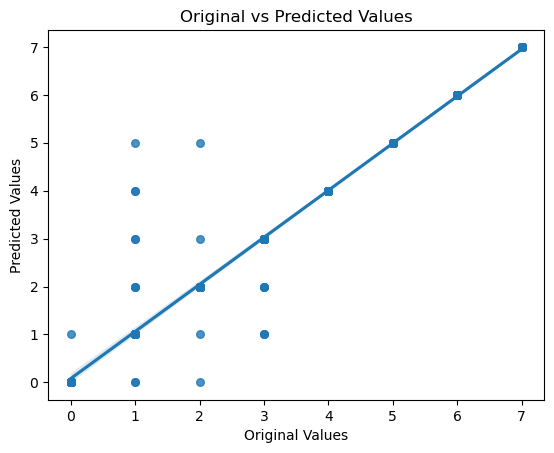

In [70]:
i
# Assuming df_conclusion contains "Original" and "Predicted" columns
# Replace df_conclusion with your actual DataFrame

# Create a regplot
sns.regplot(x="Original", y="Predicted", data=df_conclusion, scatter_kws={"s": 30})

# Label the axes and add a title
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Original vs Predicted Values")

# Show the plot
plt.show()


# Part 2

# predict the capacity_mw


In [71]:
#checking for the skewness in the x1.

x1.skew()

latitude              -0.164152
longitude              1.163320
commissioning_year    -1.719575
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
name_encoded           0.000000
gppd_idnr_encoded      0.000000
primary_fuel           0.472251
owner_encoded         -1.373940
source_encoded         1.827373
dtype: float64

Remove Skewness

In [72]:
# Removing the skewness using power_transform technique

from sklearn.preprocessing import power_transform

df_new1 = power_transform(x1)

df_new1 = pd.DataFrame(df_new1, columns=x1.columns)

df_new1.skew()

latitude              -0.076546
longitude              0.002675
commissioning_year    -0.525056
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
name_encoded          -0.288179
gppd_idnr_encoded     -0.288179
primary_fuel          -0.047067
owner_encoded         -1.025314
source_encoded        -0.214066
dtype: float64

Standard Scaler

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x1

array([[ 1.14469346, -0.86991672,  0.93307603, ...,  1.22568762,
         0.01816577,  1.46021461],
       [ 0.58232352, -0.58558978,  0.17269871, ..., -0.96787724,
         0.36390697,  2.91701919],
       [ 0.11129591, -1.67356683,  0.17269871, ...,  1.66440059,
        -2.68815328, -0.51207465],
       ...,
       [-0.97934898, -0.38359152,  0.17269871, ...,  1.66440059,
         0.6261934 , -0.51207465],
       [ 0.51382088, -0.76456427,  0.17269871, ..., -0.96787724,
        -1.62708546,  0.33959571],
       [-1.85828239,  0.0103269 ,  0.17269871, ...,  1.66440059,
         0.61427129, -0.51207465]])

# Data Preproccessing

In [74]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Model Training

# LinerRegression:

In [75]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
LR = LinearRegression(fit_intercept=True)

# Fit the model with training data
LR.fit(x1_train, y1_train)

# Print the coefficients and intercept
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

# Predicting the new result using the test set
y1_pred = LR.predict(x1_test)
y1_pred  # y1_pred contains the predicted values for x1_test


Linear coefficients : [   4.3906322   -17.08777517   87.57257236  101.39155785 -123.21404574
   70.60124737  -49.11336545  443.58320441   35.8439005  -100.96297935
  -73.75029096   89.48352482  -90.58571115]
Intercept : 329.2929184368115


array([ 3.34734841e+02,  2.04848851e+02, -1.25179291e+02,  1.21903391e+02,
        4.46996647e+02,  2.74694413e+02, -7.71529651e+01, -6.65097657e+01,
        4.57347519e+02,  2.00420384e+02,  2.18196411e+02,  2.83474537e+02,
       -1.55509751e+02,  1.19077278e+02,  1.32357794e+02,  1.05767490e+02,
       -4.10151445e+01,  3.53851073e+02,  7.20417859e+02,  2.23444736e+02,
       -9.14078512e+01, -4.60968855e+01, -1.54900261e+02,  2.84572062e+02,
        1.86617402e+02,  6.42328566e+01,  1.05781324e+03, -4.44632825e+01,
       -1.56287683e+02,  2.28945270e+02,  3.11331225e+02,  3.23642136e+02,
        4.14782053e+02,  6.22695955e+02,  2.87101261e+02, -6.08052192e+01,
       -1.08076519e+02,  2.80878651e+02,  4.85908132e+02,  1.23953190e+02,
        1.65887330e+02,  3.99864384e+02,  4.93828404e+02,  2.39809217e+02,
        1.09716357e+02,  7.34500082e+02,  2.59370247e+02,  1.36828069e+02,
        4.39345135e+02, -1.37428539e+01,  1.46317592e+02,  4.83415411e+02,
        8.95083468e+01,  

In [76]:
# Calculate R-squared
r2 = r2_score(y1_test, y1_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y1_test, y1_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)


print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.7732310245152498
Mean Squared Error (MSE): 69116.63360014472
Root Mean Squared Error (RMSE): 262.9004252566829


# RandomForest Regressor

In [77]:
# Create an instance of the Random Forest Regressor model
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model with the training data
RF.fit(x1_train, y1_train)

# Predicting the new result using the test set
pred_rf = RF.predict(x1_test)

# Calculate the mean squared error and R-squared (R2) to evaluate the model
mse = mean_squared_error(y1_test,pred_rf)
r2 = r2_score(y1_test, pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 36255.21541939731
Root Mean Squared Error (RMSE): 190.40802351633533
R-squared (R2) Score: 0.8810480541601721


# KNeighborsRegressor:

In [78]:
# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can specify the number of neighbors

# Fit the model
knn.fit(x1_train, y1_train)

# Make predictions
y1_pred = knn.predict(x1_test)
# Calculate MSE
mse = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error (MSE) for KNN: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) for KNN: {rmse}")

# Calculate R-squared
r2 = r2_score(y1_test, y1_pred)
print(f"R-squared for KNN: {r2}")

Mean Squared Error (MSE) for KNN: 69302.6950792556
Root Mean Squared Error (RMSE) for KNN: 263.2540504517558
R-squared for KNN: 0.7726205640689375


# Ridge Regression:

In [80]:
from sklearn.linear_model import Ridge

# Create a Ridge regression instance
ridge = Ridge(alpha=1.0)

# Fit the Ridge regression model on the training data
ridge.fit(x1_train, y1_train)

# Retrieve the coefficients and intercept
coefficients = ridge.coef_
intercept = ridge.intercept_

print("Ridge Coefficients:", coefficients)
print("Ridge Intercept:", intercept)

Ridge Coefficients: [   4.41021097  -17.01768693   87.53917795   97.7897504  -115.52346575
   66.16322819  -31.16797871  425.72081933   35.59796321 -100.83569621
  -73.80644511   89.40656967  -90.47995045]
Ridge Intercept: 329.2147236183831


In [81]:
# Predicting the target values
pred_ridge = ridge.predict(x1_test)

# Calculating Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y1_test, pred_ridge)
print(f"Mean Squared Error (MSE) for Ridge Regression: {mse_ridge}")

# Calculating Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)
print(f"Root Mean Squared Error (RMSE) for Ridge Regression: {rmse_ridge}")

# Calculating R-squared
r2_ridge = r2_score(y1_test, pred_ridge)
print(f"R-squared for Ridge Regression: {r2_ridge}")

Mean Squared Error (MSE) for Ridge Regression: 69134.30970072374
Root Mean Squared Error (RMSE) for Ridge Regression: 262.9340405895055
R-squared for Ridge Regression: 0.773173029919592


In [82]:
# Creating a dictionary with the metrics
data = {
    "Model": ["Linear Regression", "Random Forest", "KNN", "Ridge Regression"],
    "R-squared (R2)": [0.773, 0.881, 0.773, 0.773],
    "MSE": [69116.63, 36255.22, 69302.70, 69134.31],
    "RMSE": [262.90, 190.41, 263.25, 262.93]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

               Model  R-squared (R2)       MSE    RMSE
0  Linear Regression           0.773  69116.63  262.90
1      Random Forest           0.881  36255.22  190.41
2                KNN           0.773  69302.70  263.25
3   Ridge Regression           0.773  69134.31  262.93


The Random Forest model seems to perform better in terms of RMSE and R-squared compared to Linear Regression, KNN, and Ridge Regression. It generally exhibits the lowest RMSE and the highest R-squared value, indicating better predictive performance in this context.

# Hyper parameter Tuning

In [83]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]  # Method for sampling data points
}

# Create an instance of the Random Forest Regressor model
RF = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RF, param_distributions=params, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model using the training data
random_search.fit(x1_train, y1_train)

# Get the best parameters
print("Best parameters:", random_search.best_params_)

# Get the best estimator
best_rf = random_search.best_estimator_

# Predict the new result using the test set
pred_rf = best_rf.predict(x1_test)

# Calculate the mean squared error, R-squared, and RMSE to evaluate the model
mse = mean_squared_error(y1_test, pred_rf)
r2 = r2_score(y1_test, pred_rf)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
Mean Squared Error: 37143.48173368321
Root Mean Squared Error (RMSE): 192.7264427464047
R-squared (R2) Score: 0.8781336870743335


# Save The model

In [87]:
import pickle
filename = 'global_power_plant_capacity_mw.pkl'
pickle.dump(best_rf, open(filename,'wb'))

In [88]:
a = np.array(y1_test)
predicted = np.array(best_rf.predict(x1_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,187.2,410.575762
1,50.4,22.083200
2,41.4,62.854800
3,770.0,484.471718
4,4.5,10.148400
...,...,...
177,120.0,226.698340
178,1500.0,1377.775000
179,4.5,25.597248
180,460.0,742.983000


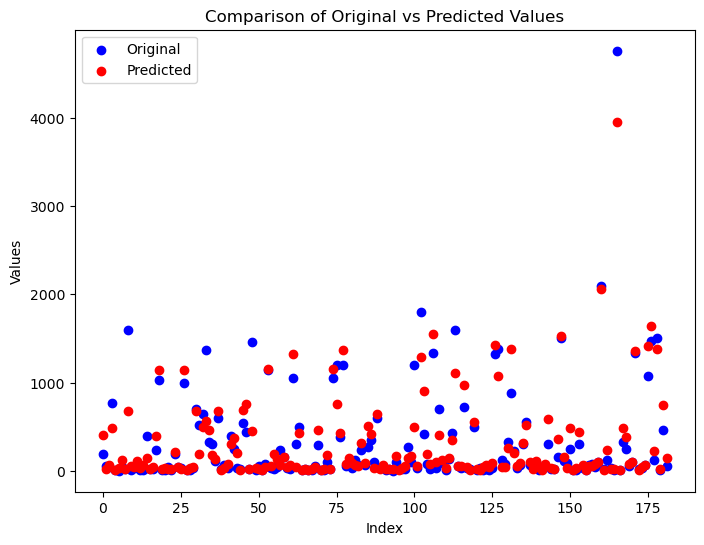

In [89]:
import matplotlib.pyplot as plt

# Assuming df_conclusion contains 'Original' and 'Predicted' columns

plt.figure(figsize=(8, 6))
plt.scatter(df_conclusion.index, df_conclusion['Original'], label='Original', color='blue')
plt.scatter(df_conclusion.index, df_conclusion['Predicted'], label='Predicted', color='red')

plt.title('Comparison of Original vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
